# Testing the BRASS module

This notebook was used to test the BRASS Python module that implement classes to generate and test for the association between binary variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import sys

sys.path.append("../")
import brass as br

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Generating synthetic variables

Let's test the generation of binary variables.

### Independent variables

In [2]:
# Generator of independent variables A and B with probabilities P(A=1) = 10% and P(B=1) = 20%: 
pA = 0.1
pB = 0.2
indep = br.VarGenerator(0, pA, pB)

In [3]:
# Generate independent variables:
n_sample = 20000
#n_sample = 200
indep_A, indep_B = indep.sample(n_sample, seed=5955)

In [4]:
# Test A alone:
mA = indep_A.mean()
dA = indep_A.std()
# Student t-test:
(mA - pA) / dA * np.sqrt(n_sample)

0.702448023805799

In [5]:
# Test B alone:
mB = indep_B.mean()
dB = indep_B.std()
# Student t-test:
(mB - pB) / dB * np.sqrt(n_sample)

0.31766324907000015

In [6]:
# Correlation:
np.corrcoef(indep_A, indep_B)

array([[1.        , 0.00750955],
       [0.00750955, 1.        ]])

### Dependent variables

In [7]:
# Generator of dependent variables A and B with a probability boost on A [delta P(A,B)] of 40%: 
dep = br.VarGenerator(0.4, 0.1, 0.2)

In [8]:
# Generate independent variables:
n_sample = 20000
#n_sample = 20
dep_A, dep_B = dep.sample(n_sample, seed=1324)

In [9]:
# Test A alone:
mA = dep_A.mean()
dA = dep_A.std()
# Student t-test:
(mA - pA) / dA * np.sqrt(n_sample)

0.4926838989053054

In [10]:
# Test B alone:
mB = dep_B.mean()
dB = dep_B.std()
# Student t-test:
(mB - pB) / dB * np.sqrt(n_sample)

1.0897322820380317

In [11]:
# Correlation:
np.corrcoef(dep_A, dep_B)

array([[1.       , 0.6641212],
       [0.6641212, 1.       ]])

## Estimating variable association

### Independent variables

In [12]:
# Organizing the input as X (n_instances, n_variables):
indep_X = np.column_stack((indep_A, indep_B))
# Create Bayesian model with flat prior:
model0_X = br.AssocEstimator(onehot_trials=indep_X, prior_alpha=1)
# Create Bayesian model with informative prior:
model1_X = br.AssocEstimator(onehot_trials=indep_X, prior_alpha=(1.2, 1.1, 1.1, 0.8))

In [13]:
# Sample model parameters:
X0_chain_df = model0_X.sample_model()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pair_probs]


Sampling 4 chains for 1_000 tune and 2_500 draw iterations (4_000 + 10_000 draws total) took 2 seconds.


In [14]:
# Sample model parameters:
X1_chain_df = model1_X.sample_model()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pair_probs]


Sampling 4 chains for 1_000 tune and 2_500 draw iterations (4_000 + 10_000 draws total) took 2 seconds.


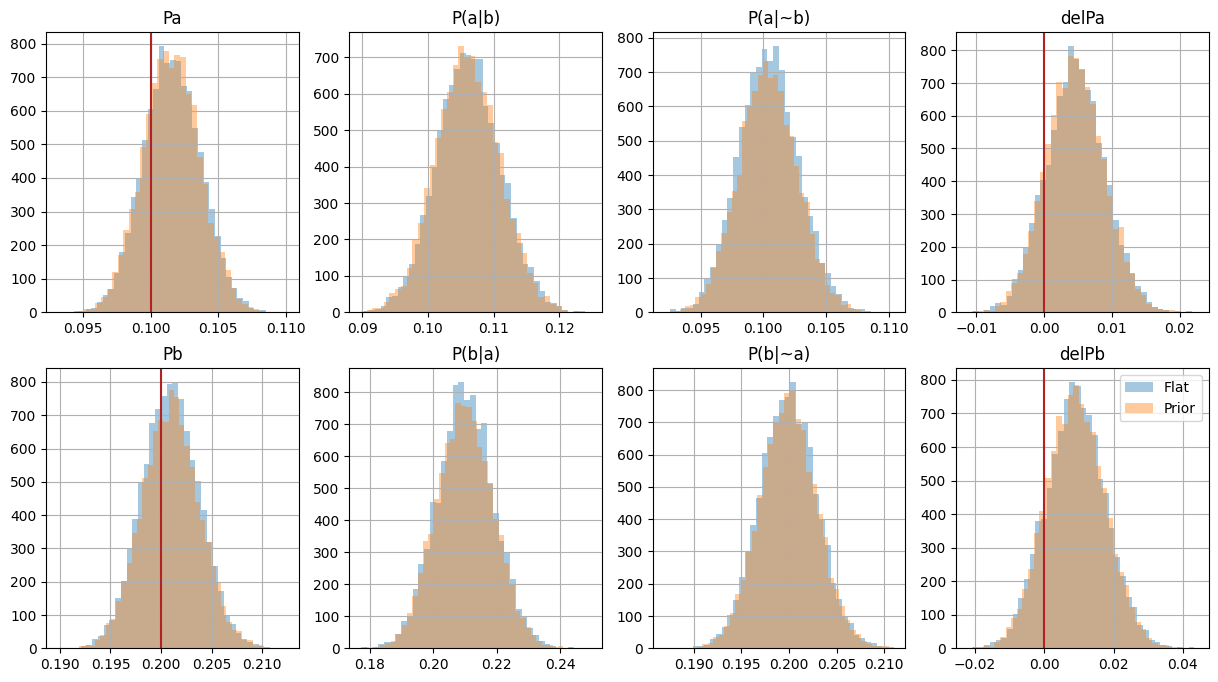

In [19]:
# Check posterior distributions for the probabilities:
model0_X.plot_chain_probs(X0_chain_df, label='Flat')
model1_X.plot_chain_probs(X1_chain_df, label='Prior', figsize=None)

# True values:
pl.subplot(2,4,1)
pl.axvline(pA, color='firebrick')
pl.subplot(2,4,5)
pl.axvline(pB, color='firebrick')
pl.subplot(2,4,4)
pl.axvline(0, color='firebrick')
pl.subplot(2,4,8)
pl.axvline(0, color='firebrick')

pl.legend()
pl.show()

### Dependent variables

In [20]:
# Organizing the input as X (n_instances, n_variables):
dep_X = np.column_stack((dep_A, dep_B))
# Create Bayesian model with flat prior:
model0_X = br.AssocEstimator(onehot_trials=dep_X, prior_alpha=1)
# Create Bayesian model with informative prior:
model1_X = br.AssocEstimator(onehot_trials=dep_X, prior_alpha=(2, 1.4, 1.4, 0.8))

In [21]:
# Sample model parameters:
X0_chain_df = model0_X.sample_model()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pair_probs]


Sampling 4 chains for 1_000 tune and 2_500 draw iterations (4_000 + 10_000 draws total) took 16 seconds.


In [22]:
# Sample model parameters:
X1_chain_df = model1_X.sample_model()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pair_probs]


Sampling 4 chains for 1_000 tune and 2_500 draw iterations (4_000 + 10_000 draws total) took 14 seconds.


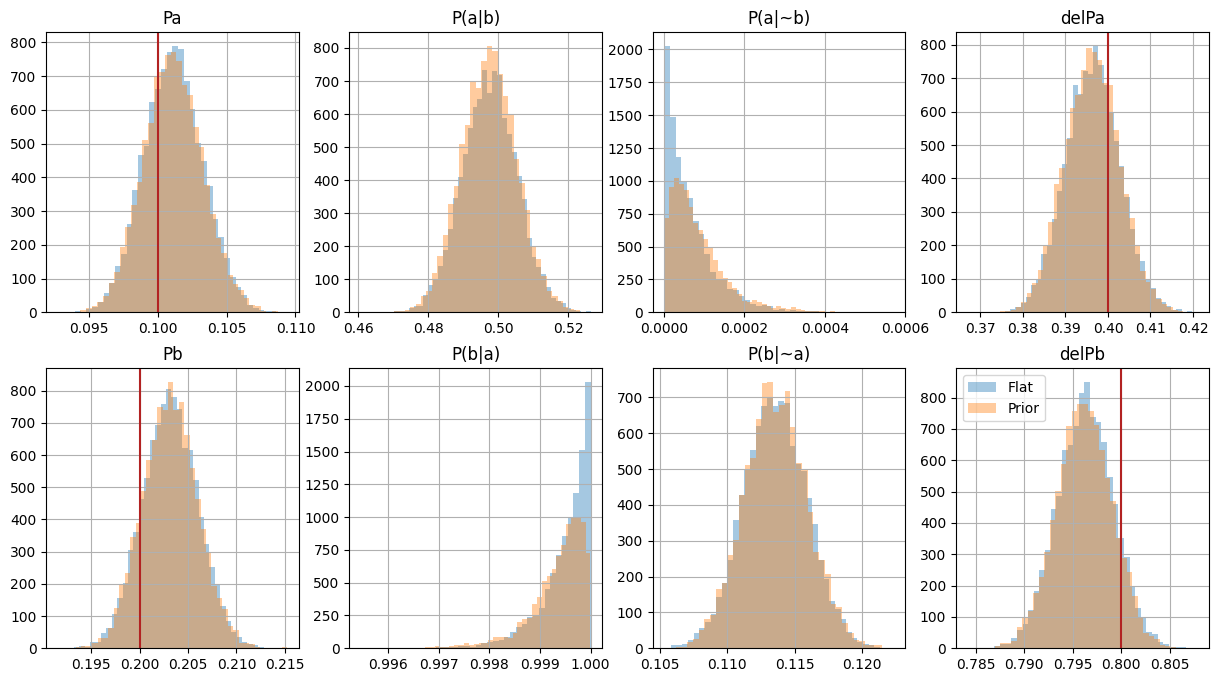

In [24]:
# Check posterior distributions for the probabilities:
model0_X.plot_chain_probs(X0_chain_df, label='Flat')
model1_X.plot_chain_probs(X1_chain_df, label='Prior', figsize=None)

# True values:
pl.subplot(2,4,1)
pl.axvline(dep.Pa, color='firebrick')
pl.subplot(2,4,5)
pl.axvline(dep.Pb, color='firebrick')
pl.subplot(2,4,4)
pl.axvline(dep.delPa, color='firebrick')
pl.subplot(2,4,8)
pl.axvline(dep.delPa*dep.Pb/dep.Pa, color='firebrick')

pl.legend()
pl.show()